In [211]:
# About the data:
      # The data about to get imported can be held from private login to 'Tiingo.com'- Stock database.Tiingo database is one among various database available at pandasdataframe reader.
      # Through a private api key can be given at Tinngo.com , dataset could be handled.
      # For our dataset , its already kept as real in 'krishnaik' github profile for users reference.
      # Its timeseries data. starts from 2015-05-2017 and ends with 2020-05-22.

In [212]:
# Importing the data
import pandas as pd
Data = pd.read_csv('/content/drive/MyDrive/AAPL - Stock data.csv')
Data.head()
#Data.tail()
#Data.shape             # (1258,15)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [213]:
# Check for null values
Data[Data.isnull().any(axis=1)]
# No null records

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor


In [214]:
# In order to predict the stock , we are fetching the important feature 'close' out for further operations.
Data_close_R = Data.reset_index()['close'] # reset the data and takes out 'close' feature
#Data_close_R.shape           #(1258,)
Data_close_R.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

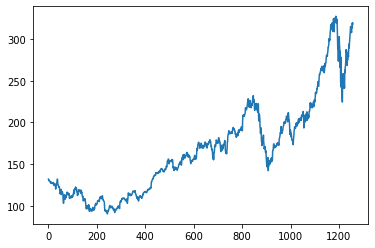

In [215]:
# To have an illustrate idea
import matplotlib.pyplot as plt
plt.plot(Data_close_R)

In [216]:
import numpy as np
# LSTM is sensitive to data.So to have uniform variation in data , it has to pass through MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Data_close=scaler.fit_transform(np.array(Data_close_R).reshape(-1,1))                  # reshape (-1,1) indicate 1D array
#len(Data_close)  # 1258
print(Data_close)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


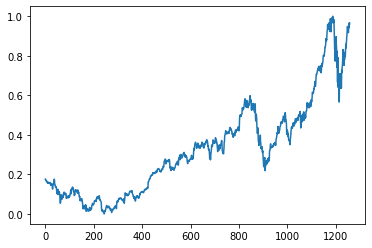

In [217]:
# To have an illustrate idea after MinMaxScaler
import matplotlib.pyplot as plt
plt.plot(Data_close)
# profile never varies but values are kept in range between(0,1)

In [218]:
#Split train and test data from single feature 'close':
train_size=int(len(Data_close)*0.65)
test_size=len(Data_close)-train_size
train_data,test_data=Data_close[:train_size,:],Data_close[train_size:len(Data_close),:]
print(test_data.shape ,',',train_data.shape)

(441, 1) , (817, 1)


In [219]:
# (*****XXXX**** Such a mind blowing code )
# Convert train_date and test_data (arrays) into dataset
# define the function(new_dataset) to execute the work.
import numpy
def new_dataset (dataset, time_step=1):                          # define the function with imaginary dataset and time_step 
  dataX,dataY = [],[]                                            # concept two list
  for i in range(len(dataset)-time_step-1):                      # assume range for i 
    a = dataset[i:(i+time_step),0]                               #variable a is the slice of dataset [i:(i+time_step),0]  (Step *X*)
    dataX.append(a)                                              # append a to dataX
    dataY.append(dataset[i+time_step,0])                         # append dataset[i+time_step,0] to dataY                  (Step *X*)
  return numpy.array(dataX),numpy.array(dataY)                   

In [220]:
# putting train_data and test_data into new_dataset
time_step = 100
X_train, y_train = new_dataset(train_data, time_step)                  # time_step of 100 is only getting applied at the steps *X*...apart from this in previous cell time_step value was 1
X_test, y_test = new_dataset(test_data, time_step)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
(X_train)

(716, 100) (716,) (340, 100) (340,)


array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [221]:
# reshape the inputs ie.X_train,X_test into (3X3) matrix for the requirement of LSTM layers.
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)          # here 1 indicates no of sample...[0] indicates features , [1] indicates timesteps=100 for our case
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape,X_test.shape)
X_train

(716, 100, 1) (340, 100, 1)


array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.34801148],
        [0.32930845],
        [0.32145571],
        ...,
        [0.50042219],
        [0.50413747],
        [0.5062062 ]],

       [[0.32930845],
        [0.32145571],
        [0.32694419],
        ...,
        [0.50413747],
        [0.5062062 ],
        [0.51920966]],

       [[0.32145571],
        [0.32694419],
        [0.32230009],
        ...,
        [0.5062062 ],
        [0.51920966],
        [0.53719497]]])

In [222]:
# Defining Stacked LSTM model:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [223]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))       # Stacked LSTM contain multilayers of LSTM
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [224]:
# Train the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 131ms/step - loss: 0.0201 - val_loss: 0.0645
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 8.4130e-04 - val_loss: 0.0035
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 7.9007e-04 - val_loss: 0.0046
Epoch 6/100
12/12 [==============================] - 0s 26ms/step - loss: 5.5819e-04 - val_loss: 0.0054
Epoch 7/100
12/12 [==============================] - 0s 26ms/step - loss: 5.9537e-04 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 0s 24ms/step - loss: 5.7701e-04 - val_loss: 0.0042
Epoch 9/100
12/12 [==============================] - 0s 26ms/step - loss: 5.7779e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 0s 25ms/step - loss: 

In [225]:
# Evaluate the model:1.Prediction :
train_y_predict=model.predict(X_train)
test_y_predict=model.predict(X_test)
print(train_y_predict.shape,test_y_predict.shape)
test_y_predict

(716, 1) (340, 1)


array([[0.2700335 ],
       [0.27158722],
       [0.27458185],
       [0.27858323],
       [0.27901664],
       [0.2767119 ],
       [0.272269  ],
       [0.27192986],
       [0.27399123],
       [0.2752275 ],
       [0.28433722],
       [0.29903945],
       [0.31343186],
       [0.32748523],
       [0.3407168 ],
       [0.35005164],
       [0.35069427],
       [0.3444463 ],
       [0.3349766 ],
       [0.32799184],
       [0.324447  ],
       [0.3245944 ],
       [0.32667008],
       [0.3297457 ],
       [0.33376673],
       [0.33653742],
       [0.33948907],
       [0.34335974],
       [0.34700817],
       [0.34989285],
       [0.34971976],
       [0.3492135 ],
       [0.34998015],
       [0.35121262],
       [0.35122874],
       [0.34825203],
       [0.34452173],
       [0.34784287],
       [0.35786578],
       [0.3700022 ],
       [0.38153526],
       [0.39173967],
       [0.4003054 ],
       [0.4038211 ],
       [0.4045473 ],
       [0.4113444 ],
       [0.41655126],
       [0.415

In [226]:
#Transformback to original form # To compete with y_test , y_train 
train_predict=scaler.inverse_transform(train_y_predict)
test_predict=scaler.inverse_transform(test_y_predict)
print(train_predict.shape,test_predict.shape)
test_predict

(716, 1) (340, 1)


array([[154.30014],
       [154.66815],
       [155.37746],
       [156.32523],
       [156.42789],
       [155.88199],
       [154.82964],
       [154.7493 ],
       [155.23756],
       [155.53038],
       [157.68811],
       [161.17049],
       [164.57947],
       [167.90816],
       [171.04219],
       [173.25323],
       [173.40544],
       [171.92555],
       [169.68256],
       [168.02814],
       [167.18852],
       [167.22343],
       [167.71507],
       [168.44357],
       [169.396  ],
       [170.05225],
       [170.75139],
       [171.6682 ],
       [172.53235],
       [173.21562],
       [173.17462],
       [173.05472],
       [173.2363 ],
       [173.52821],
       [173.53204],
       [172.82698],
       [171.94342],
       [172.73006],
       [175.1041 ],
       [177.97871],
       [180.71045],
       [183.12746],
       [185.15633],
       [185.98906],
       [186.16107],
       [187.77103],
       [189.00433],
       [188.74873],
       [187.06578],
       [185.56764],


In [227]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
Train_MSE = math.sqrt(mean_squared_error(y_train,train_predict))
Test_MSE = math.sqrt(mean_squared_error(y_test,test_predict))
print(Train_MSE ,',', Test_MSE)

141.1457972145027 , 236.61202484500265


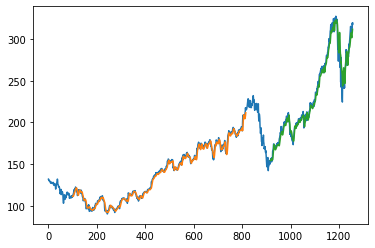

In [228]:
# Plotting 
# shift train predictions for plotting
look_back=100                                                                                     # time_step = 100
trainPredictPlot = numpy.empty_like(Data_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict                      # To make plot at correct index
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(Data_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data_close)-1, :] = test_predict          # To push the plot at correct index
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [229]:
# To predict next 30 days stock:
# test_data.shape    (441,1)
x_input = test_data[341:441,:].reshape(1,-1)                         # Step 1: convert test_data into list
x_input.shape              # (shape 1,100)

(1, 100)

In [230]:
#x_input = x_input.reshape((1, 100,1))
#x_input.shape

In [231]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()                                     #Step 2:convert test_data into list
#len(temp_Input)       # 100

In [232]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.945091]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90

In [238]:
# Understanding the logic of previous cell:
Before entering into loop , empty 1st_loop and n_steps are defined.n_steps value is equaivalent to x_input features as X_input.shape was (1,100).while loop range was 30 coz we neeed stock prediction for 30 days.So when i=0, and 
len(temp_input) is 100 , while entering into while loop , the argument is passed to else condition at first where x_input is reshaped into (1,100,1) .And when model calcultaes predictions for x_input , yhat value gets the shape
(1,1).Now yhat gets printed and yhat is added at the bottom with list values of temp_input in which  the len(temp_input) is now incresed to 101.Also yhat is added to empty list 1st_output.Now i value is 1 and len(temp_input) is 101.
So arguments entered into if condition where new x_input is generated as array of temp_input.Input to this array transformation process is  temp_input which was modified to remove its first list and now its lengh is once again 100.
Statement is printed. Once again x_input is modified to have shape(1,100,1) and model predicts yhat for new x_input.Statement is printed.and the process getting repeat as long the while loop fails the condition.ie i<30.

  ############################################# Beleive me , I have taken 6 hours to understand this logic as I am fresher to DataScience ########################################

In [234]:
# Prediction Curves
day_pred = np.arange(101,131)
day_cons = np.arange(1,101)

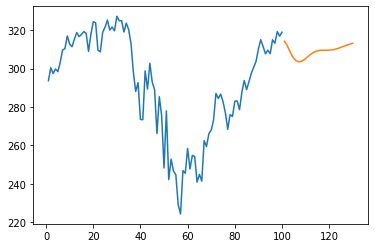

In [235]:
# To have specific idea about 30 days of prediction:
plt.plot(day_cons,scaler.inverse_transform(Data_close[1158:])) 
plt.plot(day_pred,scaler.inverse_transform(lst_output))

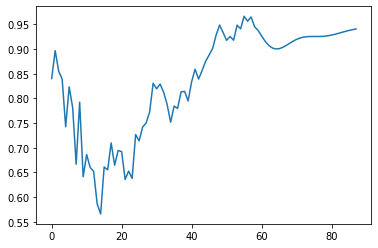

In [236]:
# To have elobarate idea about the prediction with base data
DataP=Data_close.tolist()
DataP.extend(lst_output)
plt.plot(DataP[1200:])


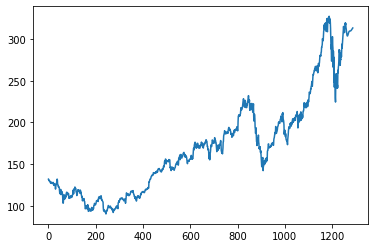

In [237]:
# To have summarized outlook of both data(old and prediction)
DataP=scaler.inverse_transform(DataP).tolist()
plt.plot(DataP)